In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
# Q1 PCA Analysis

In [2]:
## Script 1 - given in the assignment

# Function to read pixel data from the dataset
def read_pixels(data_path):
    with gzip.open(data_path) as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    normalized_pixels = pixel_data / 255
    flattened_pixels = normalized_pixels.reshape(60000,784) # TODO: Flatten the normalized pixels
    return flattened_pixels

# Function to read label data from the dataset
def read_labels(data_path):
    with gzip.open(data_path) as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    return label_data

images = read_pixels("data/train-images-idx3-ubyte.gz")
labels = read_labels("data/train-labels-idx1-ubyte.gz")

images.shape, labels.shape

((60000, 784), (60000,))

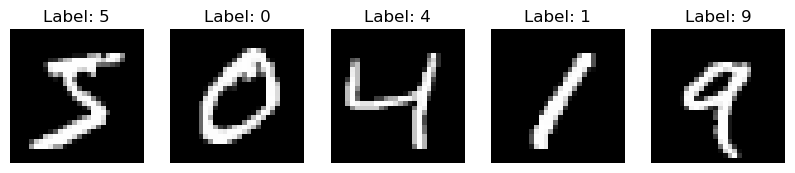

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].axis('off')
    axes[i].imshow(images[i].reshape(28,28), cmap='Greys_r')
    axes[i].set_title('Label: %i' % labels[i])
plt.show()


In [4]:
# Question 1.1 and 1.2

mean = np.mean(images, axis=0)
data_mn = images - mean
cov_mat = np.matmul(data_mn.T,data_mn)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

#sort the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
total_variance = np.sum(eigenvalues)

#calculate the variance explained by each eigenvalue for first 10 eigenvalues
variance_explained = [(i/total_variance)*100 for i in eigenvalues]
printed = 0
for i in range(len(variance_explained)):
    variance_until_i = np.sum(variance_explained[:i+1])
    if i < 10 or 18<i<30:
        print(str(i+1)+'. principal component |','PVE:',variance_explained[i].round(3),'| Cumulative PVE:',variance_until_i.round(3))
    
    if variance_until_i >= 70:
        if printed == 0:
            printed = 1
            print('The first',str(i+1),'principal components explain more than 70% of the variance in the data:', variance_until_i.round(3))
    if i == 29:
        break

1. principal component | PVE: 9.705 | Cumulative PVE: 9.705
2. principal component | PVE: 7.096 | Cumulative PVE: 16.801
3. principal component | PVE: 6.169 | Cumulative PVE: 22.97
4. principal component | PVE: 5.389 | Cumulative PVE: 28.359
5. principal component | PVE: 4.869 | Cumulative PVE: 33.228
6. principal component | PVE: 4.312 | Cumulative PVE: 37.54
7. principal component | PVE: 3.272 | Cumulative PVE: 40.812
8. principal component | PVE: 2.884 | Cumulative PVE: 43.696
9. principal component | PVE: 2.762 | Cumulative PVE: 46.458
10. principal component | PVE: 2.357 | Cumulative PVE: 48.815
20. principal component | PVE: 1.153 | Cumulative PVE: 64.358
21. principal component | PVE: 1.066 | Cumulative PVE: 65.424
22. principal component | PVE: 1.007 | Cumulative PVE: 66.431
23. principal component | PVE: 0.954 | Cumulative PVE: 67.385
24. principal component | PVE: 0.913 | Cumulative PVE: 68.297
25. principal component | PVE: 0.883 | Cumulative PVE: 69.18
26. principal compone

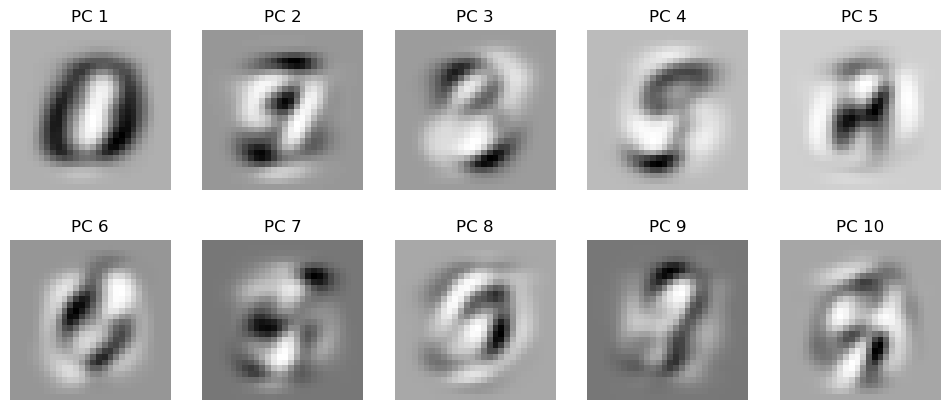

In [5]:
# Question 1.3

first_ten = eigenvectors[:,:10]
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, column_vector in enumerate(first_ten.T):
    max_val = np.max(column_vector)
    min_val = np.min(column_vector)
    column_vector = (column_vector - min_val) / (max_val - min_val)
    ax = axes[i // 5, i % 5]
    ax.axis('off')
    ax.imshow(column_vector.reshape(28, 28), cmap='Greys_r')
    ax.set_title('PC {}'.format(i + 1))
plt.show()


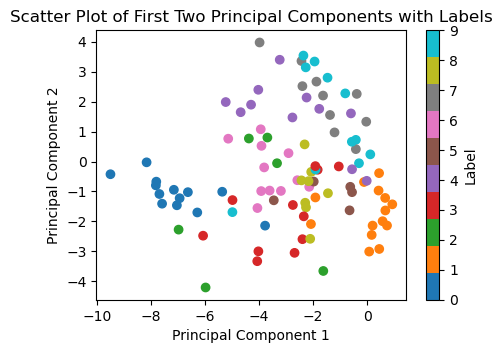

In [6]:
# Question 1.4

# Get the first 100 images and their labels
first_100_images = images[:100]
first_100_labels = labels[:100]
first_two = eigenvectors[:,:2]

# Project the first 100 images onto the first 2 principal components
projected_data = np.dot(first_100_images, first_two)

# Plot the projected data points with different colors according to their labels
plt.figure(figsize=(5, 3.5))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=first_100_labels, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components with Labels')
plt.colorbar(label='Label')
plt.show()


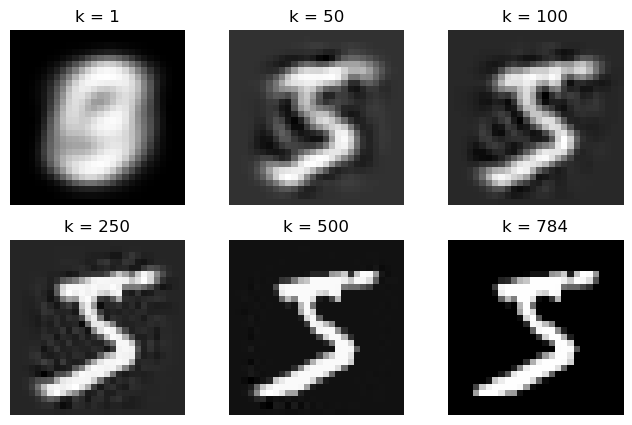

In [10]:
# Question 1.5

# Reconstruction of images
k_values = (1, 50, 100, 250, 500, 784)
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for k in k_values:  
    i = k_values.index(k)  
    #select k biggest eigenvectors
    first_k_eigen = eigenvectors[:,:k].T
    projection = np.matmul(images-mean,first_k_eigen.T)
    projection = np.matmul(projection,first_k_eigen) + mean
    #plot first images for each k value
    ax = axes[i // 3, i % 3]
    ax.axis('off')
    ax.imshow(projection[0].reshape(28,28), cmap='Greys_r')
    ax.set_title('k = '+str(k))
plt.show()